<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_0_)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.8_n20.csv',
 'data_add_delta_-0.8_n30.csv',
 'data_add_delta_-0.8_n60.csv',
 'data_add_delta_-0.8_n120.csv',
 'data_add_delta_-0.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.603264,43.012330,80.803224,0.015918,233.434736,233.429027,0.005709
1,0.0,1.0,36.804833,30.490365,41.718286,-0.030461,118.983024,118.998022,-0.014998
2,0.0,2.0,68.936198,40.178470,74.862601,-0.023180,193.954090,193.977622,-0.023532
3,0.0,3.0,21.169791,56.283036,44.501757,-0.031564,131.923020,131.936483,-0.013463
4,0.0,4.0,66.729593,59.050453,33.399193,0.013744,169.192982,169.171881,0.021101
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.921336,32.598956,57.869244,0.015931,167.405467,167.394789,0.010678
59996,999.0,56.0,25.813623,78.076738,29.272661,0.010562,143.173585,143.175401,-0.001816
59997,999.0,57.0,89.148432,65.093591,83.799039,-0.017548,248.023513,248.036802,-0.013288
59998,999.0,58.0,54.260042,26.502889,83.713229,-0.144279,174.331880,174.472658,-0.140777


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.603264,43.012330,80.803224,0.015918,233.434736,233.429027,0.005709
1,0.0,1.0,36.804833,30.490365,41.718286,-0.030461,118.983024,118.998022,-0.014998
2,0.0,2.0,68.936198,40.178470,74.862601,-0.023180,193.954090,193.977622,-0.023532
3,0.0,3.0,21.169791,56.283036,44.501757,-0.031564,131.923020,131.936483,-0.013463
4,0.0,4.0,66.729593,59.050453,33.399193,0.013744,169.192982,169.171881,0.021101
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.921336,32.598956,57.869244,0.015931,167.405467,167.394789,0.010678
59996,999.0,56.0,25.813623,78.076738,29.272661,0.010562,143.173585,143.175401,-0.001816
59997,999.0,57.0,89.148432,65.093591,83.799039,-0.017548,248.023513,248.036802,-0.013288
59998,999.0,58.0,54.260042,26.502889,83.713229,-0.144279,174.331880,174.472658,-0.140777


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    99.603264  43.012330  80.803224  ...  233.434736  233.429027  0.005709
      1.0    36.804833  30.490365  41.718286  ...  118.983024  118.998022 -0.014998
      2.0    68.936198  40.178470  74.862601  ...  193.954090  193.977622 -0.023532
      3.0    21.169791  56.283036  44.501757  ...  131.923020  131.936483 -0.013463
      4.0    66.729593  59.050453  33.399193  ...  169.192982  169.171881  0.021101
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.921336  32.598956  57.869244  ...  167.405467  167.394789  0.010678
      56.0   25.813623  78.076738  29.272661  ...  143.173585  143.175401 -0.001816
      57.0   89.148432  65.093591  83.799039  ...  248.023513  248.036802 -0.013288
      58.0   54.260042  26.502889  83.713229  ...  174.331880  174.472658 -0.140777
      59.0   81.967960  31.221075  70.237942  ...  193.460077  193.428411  0.031667

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    99.603264  43.012330  80.803224  ...  233.434736  233.429027  0.005709
      1.0    36.804833  30.490365  41.718286  ...  118.983024  118.998022 -0.014998
      2.0    68.936198  40.178470  74.862601  ...  193.954090  193.977622 -0.023532
      3.0    21.169791  56.283036  44.501757  ...  131.923020  131.936483 -0.013463
      4.0    66.729593  59.050453  33.399193  ...  169.192982  169.171881  0.021101
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.921336  32.598956  57.869244  ...  167.405467  167.394789  0.010678
      56.0   25.813623  78.076738  29.272661  ...  143.173585  143.175401 -0.001816
      57.0   89.148432  65.093591  83.799039  ...  248.023513  248.036802 -0.013288
      58.0   54.260042  26.502889  83.713229  ...  174.331880  174.472658 -0.140777
      59.0   81.967960  31.221075  70.237942  ...  193.460077  193.428411  0.031667

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,99.603264,43.012330,80.803224,0.015918,233.434736,233.429027,0.005709
1,0.0,1.0,36.804833,30.490365,41.718286,-0.030461,118.983024,118.998022,-0.014998
2,0.0,2.0,68.936198,40.178470,74.862601,-0.023180,193.954090,193.977622,-0.023532
3,0.0,3.0,21.169791,56.283036,44.501757,-0.031564,131.923020,131.936483,-0.013463
4,0.0,4.0,66.729593,59.050453,33.399193,0.013744,169.192982,169.171881,0.021101
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,66.921336,32.598956,57.869244,0.015931,167.405467,167.394789,0.010678
59996,999.0,56.0,25.813623,78.076738,29.272661,0.010562,143.173585,143.175401,-0.001816
59997,999.0,57.0,89.148432,65.093591,83.799039,-0.017548,248.023513,248.036802,-0.013288
59998,999.0,58.0,54.260042,26.502889,83.713229,-0.144279,174.331880,174.472658,-0.140777


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    99.603264  43.012330  80.803224  ...  233.434736  233.429027  0.005709
      1.0    36.804833  30.490365  41.718286  ...  118.983024  118.998022 -0.014998
      2.0    68.936198  40.178470  74.862601  ...  193.954090  193.977622 -0.023532
      3.0    21.169791  56.283036  44.501757  ...  131.923020  131.936483 -0.013463
      4.0    66.729593  59.050453  33.399193  ...  169.192982  169.171881  0.021101
...                ...        ...        ...  ...         ...         ...       ...
999.0 55.0   66.921336  32.598956  57.869244  ...  167.405467  167.394789  0.010678
      56.0   25.813623  78.076738  29.272661  ...  143.173585  143.175401 -0.001816
      57.0   89.148432  65.093591  83.799039  ...  248.023513  248.036802 -0.013288
      58.0   54.260042  26.502889  83.713229  ...  174.331880  174.472658 -0.140777
      59.0   81.967960  31.221075  70.237942  ...  193.460077  193.428411  0.031667

[60000 rows x 7 columns]

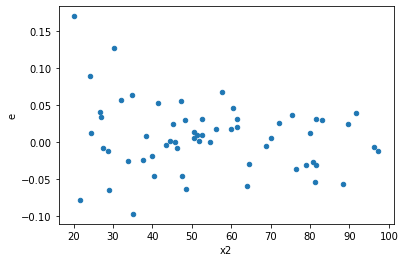

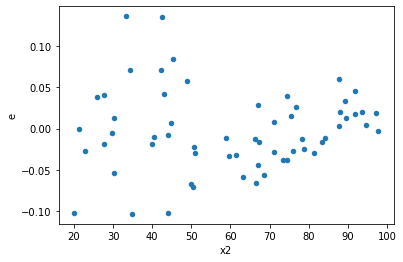

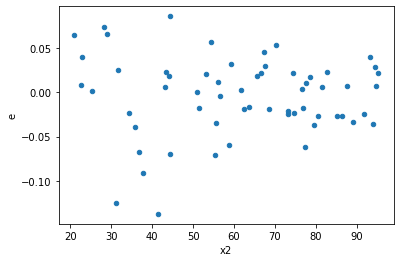

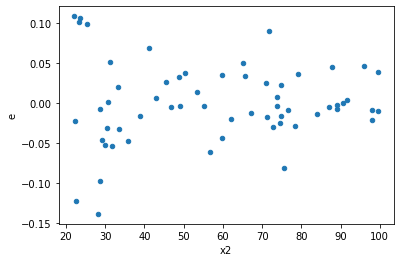

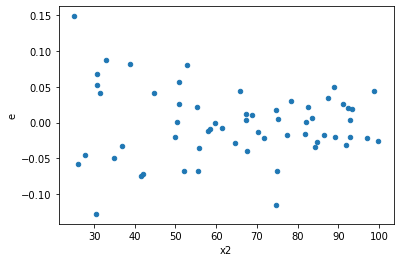

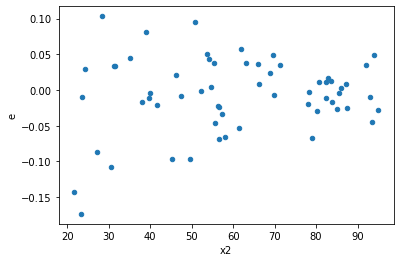

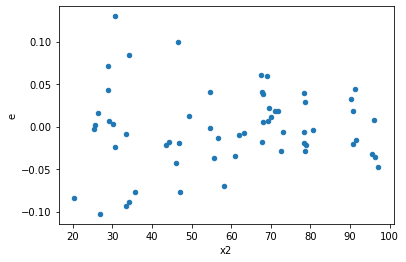

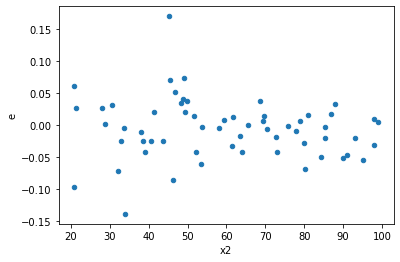

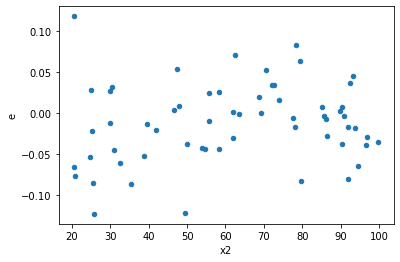

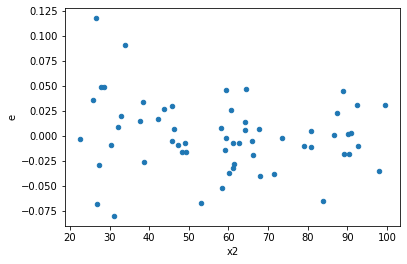

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,0.012643771319899163,0.024021597545880815,0.0006321885659949581,0.0012010798772940407,0.526350143688395,0.14956036895087135,Reject005=1 : Homoscedasticity
1.0,21.0,21.0,0.013392232264364522,0.044569519561116204,0.0006696116132182261,0.00222847597805581,0.3004796191711321,0.008111705825581376,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,0.020241081249832406,0.06748601905696666,0.0010120540624916202,0.003374300952848333,0.29992999339235576,0.008020553075279435,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,0.00796808290955836,0.0618497624744337,0.000398404145477918,0.0030924881237216852,0.12882964446067288,1.6133601625107398e-05,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,0.019685151191938616,0.09059489297871011,0.0009842575595969307,0.004529744648935506,0.21728764773268894,0.000935239619942641,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,0.015112512734811479,0.06661169442380635,0.0007556256367405739,0.0033305847211903177,0.22687476824505487,0.0012692208758288733,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,0.021779680142629362,0.14733424740445708,0.001088984007131468,0.007366712370222854,0.14782496619974925,4.980881810626943e-05,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,0.023027163713881502,0.04207080350684375,0.001151358185694075,0.0021035401753421875,0.5473430929393973,0.1755517048856921,Reject005=1 : Homoscedasticity
8.0,21.0,21.0,0.011124892980647092,0.03388404144984491,0.0005562446490323546,0.0016942020724922454,0.3283224935583359,0.01383530725339443,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    851
Reject005=1 : Homoscedasticity      149
Name: Result_test, dtype: int64